# Chapter 2 Exercises

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

from scipy import stats

np.random.seed(123)

Bad val "cycler('color', [348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2])" on line #240
	"axes.prop_cycle    : cycler('color', [348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2])  # color cycle for plot lines
"
	in file "C:\Users\zhaolei\.matplotlib\matplotlibrc"
	Key axes.prop_cycle: 'cycler('color', [348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2])' is not a valid cycler construction: invalid syntax (<string>, line 1)


## Question 1
***

*Using PyMC3, change the parameters of the prior beta distribution in `our_first_model` to match those of the previous chapter. Compare the results to the previous chapter. Replace the beta distribution with a uniform one in the interval [0,1]. Are the results equivalent to $Beta(\alpha=1, \beta=1)$? Is the sampling slower, faster or the same? What about using a larger interval, such as [-1,2]? Does the model run? What errors do you get?*

In [2]:
trials = 4
theta_real = 0.35  # unknown value in a real experiment
data = stats.bernoulli.rvs(p=theta_real, size=trials)

### Baseline model
First let us set a baseline model with a $\alpha =1, \beta=1$ prior. We'll give $\theta$ a more verbose name to be able to more easily identify it later. It should be noted that string variable names do not have to the same as the object name.

When evaluating each model the strategy will be the same.
1. Run the model
2. Read the warning messages
3. View the posterior kernel density estimate and traceplot
4. Inspect the numerical summary

In [3]:
with pm.Model() as our_first_model:
    # a priori
    θ = pm.Beta('θ Beta(alpha=1, beta=1)', alpha=1., beta=1.)
    # likelihood
    y = pm.Bernoulli('y', p=θ, observed=data)
    trace_baseline = pm.sample(10000, random_seed=123,cores=1)

C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\gpuarray\dnn.py:184: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to a version >= v5 and <= v7.
  warnings.warn("Your cuDNN version is more recent than "
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ Beta(alpha=1, beta=1)]
Sampling chain 1, 0 divergences: 100%|█████████████████████████████████████████| 10500/10500 [00:08<00:00, 1178.00it/s]


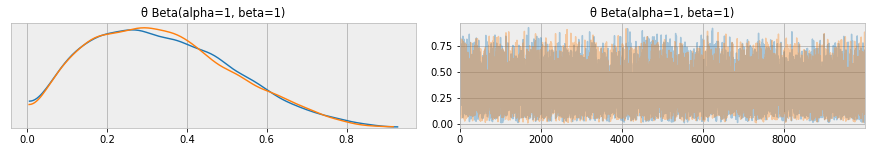

In [5]:
az.plot_trace(trace_baseline);

In [11]:
baseline_model = az.summary(trace_baseline)
baseline_model

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
"θ Beta(alpha=1, beta=1)",0.337,0.177,0.035,0.657,0.002,0.001,8968.0,8968.0,8759.0,11196.0,1.0


### Match prior for previous example

In [7]:
# Picking first parameters from page 28
with pm.Model() as our_first_model:
    # a priori
    θ = pm.Beta("θ", alpha=1,beta=1)
    # likelihood
    y = pm.Bernoulli('y', p=θ, observed=data)
    trace = pm.sample(1000, random_seed=123)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [θ]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 3000/3000 [00:09<00:00, 305.66draws/s]


### Replace the beta distribution with a uniform one in the interval [0,1]

In [7]:
with pm.Model() as our_first_model:
    # a priori
    θ = pm.Uniform('θ Uniform(0,1)', lower=0, upper=1)
    # likelihood
    y = pm.Bernoulli('y', p=θ, observed=data)
    trace_uniform_1_1 = pm.sample(10000, random_seed=123,cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ Uniform(0,1)]
Sampling chain 1, 0 divergences: 100%|█████████████████████████████████████████| 10500/10500 [00:06<00:00, 1501.40it/s]


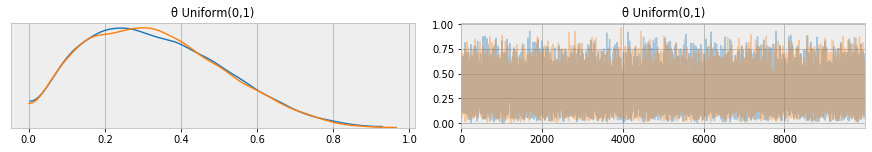

In [8]:
az.plot_trace(trace_uniform_1_1);

In [12]:
uniform_prior_0_1 = az.summary(trace_uniform_1_1)
pd.concat([baseline_model, uniform_prior_0_1])

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
"θ Beta(alpha=1, beta=1)",0.337,0.177,0.035,0.657,0.002,0.001,8968.0,8968.0,8759.0,11196.0,1.0
"θ Uniform(0,1)",0.334,0.178,0.035,0.655,0.002,0.001,8785.0,8785.0,8437.0,9988.0,1.0


### Discussion
Both priors produce identical results. This is to be expected as a $Beta(1,1)$ prior is exactly the same as a $Uniform(0,1)$ prior. I encourage you to prove it to yourself by plotting both. Furthermore, the models sampling times are identical as well.结果相同，速度相同

### Replace the beta distribution with a uniform  [-1,2]

In [4]:
with pm.Model() as our_first_model:
    # a priori
    θ = pm.Uniform('θ Uniform(-1,2)', lower=-1, upper=2)
    # likelihood
    y = pm.Bernoulli('y', p=θ, observed=data)
    trace_uniform_prior_minus_1_2 = pm.sample(10000, random_seed=123,cores=1,tune=5000,target_accept=0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ Uniform(-1,2)]
Sampling chain 1, 756 divergences: 100%|████████████████████████████████████████| 15000/15000 [00:20<00:00, 726.13it/s]
There were 680 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1436 divergences after tuning. Increase `target_accept` or reparameterize.


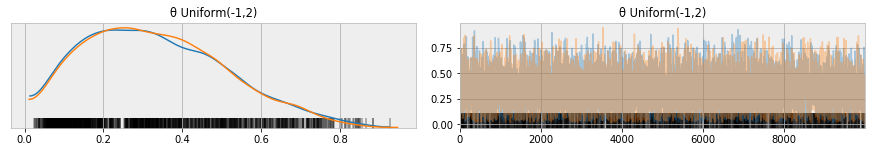

In [5]:
az.plot_trace(trace_uniform_prior_minus_1_2);

In [13]:
uniform_prior_minus_1_2 = az.summary(trace_uniform_prior_minus_1_2)
pd.concat([baseline_model, uniform_prior_minus_1_2])

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
"θ Beta(alpha=1, beta=1)",0.337,0.177,0.035,0.657,0.002,0.001,8968.0,8968.0,8759.0,11196.0,1.0
"θ Uniform(-1,2)",0.336,0.177,0.034,0.658,0.002,0.002,5305.0,5072.0,5383.0,5716.0,1.0


### Discussion
Looking at the mean, sd, and HPD values, both results look identical, which is great. However there are three items that raise concerns. We will cover these in depth in Chapter 8 but will note them here as part of the exercise.

The first is that there are two new warning messages that look something like `There were 1179 divergences after tuning. Increase target_accept or reparameterize`. Here, the sampler is warning us that something is going wrong with sampling.首先是有两个新的警告消息，看起来像在调整后有1179个背离。 增加target_accept或重新参数化(*有所改善*)。 在此，采样器警告我们采样出现问题。

The second is the black bars at the bottom of the traceplot. These also indicate divergences.第二个是轨迹图底部的黑条。 这些也表明存在分歧。

Lastly, when looking at eff_n, which stands for effective number of samples, the $Uniform(-1,2)$ prior has a much lower number than the $Beta(1,1)$, meaning that the number of useful samples was much less than the total number of samples drawn.当查看代表有效样本数的ess_mean时，$ Uniform（-1,2）$优先级数比$ Beta（1,1）$低得多，这意味着有用样本数为 比抽取的样本总数少得多。

This makes sense when asking the question "Can a probabiity be less than 0 or more than 1?". The answer is no, but in our prior we're asking the sampler to "test" prior probability values less than 0 and greater than 1, and when it does so the likelihood function is unable to compute a value.当问“概率是否可以小于0或大于1？”时，这很有意义。 答案是否定的，但是在我们先前的研究中，我们要求采样器“测试”小于0且大于1的先验概率值，并且这样做时，似然函数无法计算值。

Again, we'll cover MCMC diagnostics (and what to do) in much more detail in Chapter 8, but for now it is sufficient to be able to recognize these warnings when they appear.再次，我们将在第8章中更详细地介绍MCMC诊断（以及操作方法），但是到目前为止，能够在出现这些警告时识别它们就足够了。

## Question 2
***

*Read about the [coal mining disaster model](https://docs.pymc.io/notebooks/getting_started.html#Case-study-2:-Coal-mining-disasters) that is part of the PyMC3 documentation. Try to implement and run this model by yourself.*

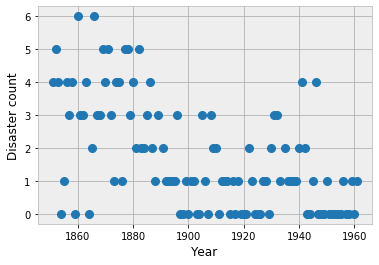

In [2]:
import pandas as pd
disaster_data = pd.Series([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                           3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                           2, 2, 3, 4, 2, 1, 3, np.nan, 2, 1, 1, 1, 1, 3, 0, 0,
                           1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                           0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                           3, 3, 1, np.nan, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                           0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])
years = np.arange(1851, 1962)

plt.plot(years, disaster_data, 'o', markersize=8);
plt.ylabel("Disaster count")
plt.xlabel("Year");

In [4]:
with pm.Model() as disaster_model:

    switchpoint = pm.DiscreteUniform('switchpoint', lower=years.min(), upper=years.max(), testval=1900)

    # Priors for pre- and post-switch rates number of disasters
    early_rate = pm.Exponential('early_rate', 1)
    late_rate = pm.Exponential('late_rate', 1)

    # Allocate appropriate Poisson rates to years before and after current
    rate = pm.math.switch(switchpoint >= years, early_rate, late_rate)

    disasters = pm.Poisson('disasters', rate, observed=disaster_data)

C:\Users\zhaolei\Anaconda3\lib\site-packages\pymc3\model.py:1430: ImputationWarning: Data in disasters contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


#### 在创建观察到的随机随机变量时，通过将具有NaN值的MaskedArray或pandas.DataFrame传递给观察到的参数来透明地处理缺失值。 在幕后，创建了另一个随机变量disasters.missing_values以对缺失值进行建模。

不幸的是，由于它们是离散变量，因此没有有意义的梯度，因此我们不能使用NUTS来采样切换点或丢失的灾难观测值。 相反，我们将使用Metroplis步骤方法进行采样，该方法实现了自适应Metropolis-Hastings，因为该方法旨在处理离散值。 PyMC3自动分配正确的采样算法。

这个模型在家目录有.theanorc文件在的时候运营失败，应该是theano报错，还是和cpu，gpu有关，当我把文件挪走后，执行成功，感觉还是要使用gpu？

In [5]:
with disaster_model:
    step = pm.Metropolis()
    trace_mh_centered = pm.sample(step=step)
    #trace = pm.sample(10000,cores=1)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [disasters_missing]
>Metropolis: [late_rate]
>Metropolis: [early_rate]
>Metropolis: [switchpoint]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 2000/2000 [00:07<00:00, 267.17draws/s]
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


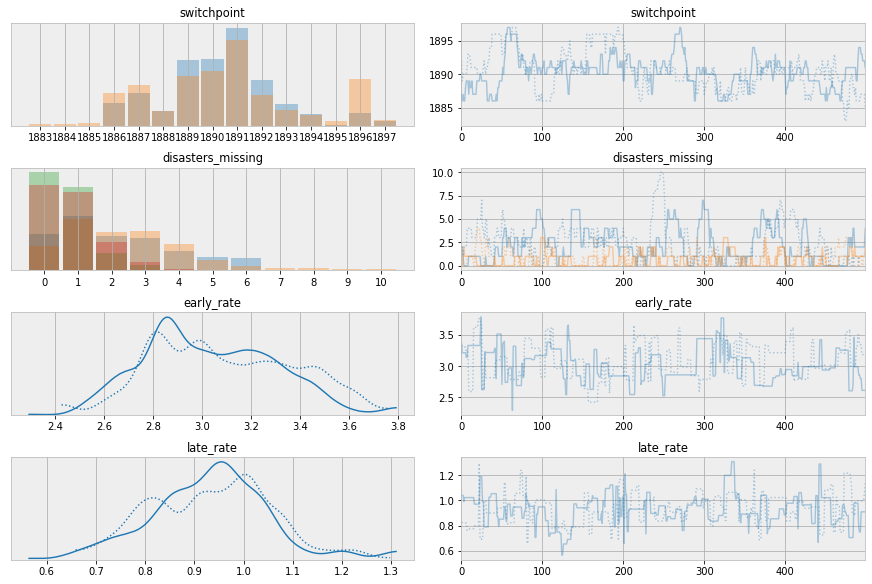

In [6]:
pm.traceplot(trace_mh_centered);

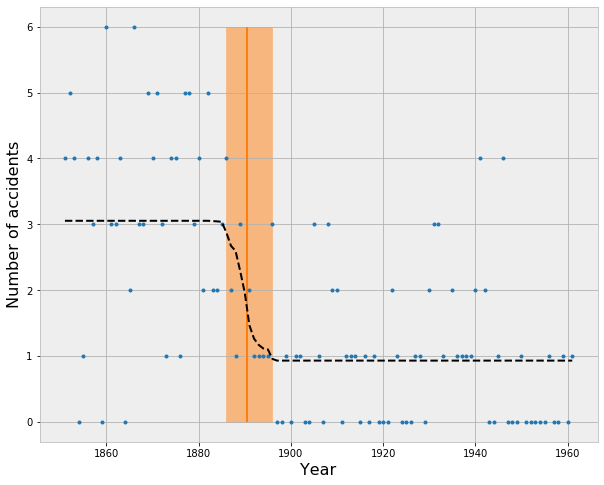

In [7]:
plt.figure(figsize=(10, 8))
plt.plot(years, disaster_data, '.')
plt.ylabel("Number of accidents", fontsize=16)
plt.xlabel("Year", fontsize=16)

plt.vlines(trace_mh_centered['switchpoint'].mean(), disaster_data.min(), disaster_data.max(), color='C1')
average_disasters = np.zeros_like(disaster_data, dtype='float')
for i, year in enumerate(years):
    idx = year < trace_mh_centered['switchpoint']
    average_disasters[i] = (trace_mh_centered['early_rate'][idx].sum() + trace_mh_centered['late_rate'][~idx].sum()) / (len(trace_mh_centered) * trace_mh_centered.nchains)

sp_hpd = pm.hpd(trace_mh_centered['switchpoint'])
plt.fill_betweenx(y=[disaster_data.min(), disaster_data.max()],
                  x1=sp_hpd[0], x2=sp_hpd[1], alpha=0.5, color='C1');
plt.plot(years, average_disasters,  'k--', lw=2);

In [15]:
len(trace_mh_centered) * trace_mh_centered.nchains

1000

In [16]:
1888 < trace_mh_centered['switchpoint']

array([False, False, False, False, False, False,  True,  True,  True,
       False,  True, False, False,  True, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

## Question 3
***

*Modify `model_g`: change the prior for the mean to a Gaussian distribution centered at the empirical mean, and play with a couple of reasonable values for the standard deviation of this prior. How robust/sensitive are the inferences to these changes? What do you think of using a Gaussian, which is an unbounded distribution (goes from $-\infty$ to $+\infty$), to model bouded data such as this? Remember that we said it is not possible to get values below 0 or above 100.*

First let's load the data and calculate the mean and standard deviation

In [19]:
data = np.loadtxt('../code/data/chemical_shifts.csv')

In [20]:
empirical_mean = np.mean(data)
empirical_std = np.std(data)
empirical_mean, empirical_std

(53.49645833333333, 3.4200063898474258)

Next, let's create a model with a prior parametrized by $\mu \text{~} N(53, \sigma)$. Since we want to test the effect of various $\sigma$ values, we'll assume that values of [1.5, 3.0, 5.0] are reasonable priors parameters. We'll also add one unreasonable $sigma$ of 1000 for comparison.

A benefit of Python is that we can create a loop to run three models and compare results.

with pm.Model() as model_g:
    μ = pm.Uniform('μ', lower=40, upper=70)
    σ = pm.HalfNormal('σ', sd=10)
    y = pm.Normal('y', mu=μ, sd=σ, observed=data)
    trace_g = pm.sample(1000)

In [21]:
summaries = []
sd_priors = [1.5, 3, 5, 1000]

for sd_prior in sd_priors:
    with pm.Model() as model_g:
        # Modified prior to Gaussian
        μ = pm.Normal(f'μ_prior_{sd_prior}', mu=empirical_mean, sd=sd_prior)
        σ = pm.HalfNormal('σ', sd=10)
        y = pm.Normal('y', mu=μ, sd=σ, observed=data)
        trace_g = pm.sample(1000)
        summaries.append(az.summary(trace_g))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ_prior_1.5]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 3000/3000 [00:07<00:00, 419.39draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ_prior_3]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 3000/3000 [00:07<00:00, 383.19draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ_prior_5]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 3000/3000 [00:07<00:00, 411.74draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ_prior_1000]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████

In [23]:
pd.concat(summaries)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
μ_prior_1.5,53.501,0.508,52.524,54.445,0.012,0.009,1716.0,1716.0,1718.0,1170.0,1.00
σ,3.540,0.372,2.869,4.230,0.009,0.006,1775.0,1757.0,1775.0,1320.0,1.00
μ_prior_3,53.494,0.525,52.555,54.474,0.013,0.009,1729.0,1726.0,1725.0,1216.0,1.00
σ,3.568,0.373,2.904,4.288,0.009,0.006,1900.0,1869.0,1916.0,1136.0,1.00
μ_prior_5,53.477,0.515,52.471,54.395,0.013,0.009,1552.0,1552.0,1556.0,1159.0,1.00
σ,3.536,0.379,2.817,4.231,0.010,0.007,1512.0,1512.0,1481.0,1083.0,1.00
μ_prior_1000,53.491,0.512,52.648,54.564,0.013,0.009,1509.0,1509.0,1504.0,1128.0,1.00
σ,3.548,0.389,2.837,4.263,0.010,0.007,1540.0,1485.0,1602.0,1020.0,1.01


Looking at the summaries, the combination of model and inference technique seem quite robust to the changes. Even with a prior that is 300x larger than the empirical prior, the posterior values converge to approximately the same result. Computationally there seems to be very little difference.综上所述，模型和推理技术的组合对于这些变化似乎很健壮。 即使先验比经验先验大300倍，后验值也收敛到大致相同的结果。 计算上似乎没有什么区别

Logically however, there could be some question about the choice of an unbounded prior. Since it is not possible to get values below 0 or above 100, it doesn't make practical sense to have a prior that exists for those values. Luckily though, with modern inference methods such as NUTS, the samples can "bypass" questionable priors and still get a good approximation of the posterior.但是从逻辑上讲，关于无限制先验的选择可能存在一些问题。 由于不可能获得小于0或大于100的值，因此对于这些值存在先验是没有实际意义的。 幸运的是，使用诸如NUTS之类的现代推理方法，样本可以“绕过”有问题的先验，并且仍然可以很好地近似后验。

## Question 4
***

*Using the data in chemical_shifts.csv, compute the empirical mean and the standard deviation with and without outliers. Repeat the exercise by adding more outliers. Compare those results to the Bayesian estimations using the Gaussian and Student's t distributions from the chapter.*

Let's first compute the mean and standard deviation without removing any data:

In [25]:
data = np.loadtxt('../code/data/chemical_shifts.csv')
empirical_mean, empirical_std = np.mean(data), np.std(data,ddof=1)
empirical_mean, empirical_std

(53.49645833333333, 3.4561979415237354)

Then let's let's identify outliers by using the _2x standard deviation_ methodology:

In [26]:
outlier_mask = ~(np.abs(data-empirical_mean) < empirical_std*2)
data[outlier_mask]

array([63.43, 68.58])

In [27]:
data[(np.abs(data-empirical_mean) > empirical_std*2)]

array([63.43, 68.58])

Removing those two values, let's recompute the mean and standard deviation:

In [28]:
empirical_mean_no_outliers = np.mean(data[~outlier_mask])
empirical_std_no_outliers = np.std(data[~outlier_mask],ddof=1)

empirical_mean_no_outliers, empirical_std_no_outliers

(52.95260869565218, 2.2192856055572965)

Notice that the mean has dropped from 53.49 to 52.95, and the standard deviation has dropped from 3.42 to 2.19. Logically this makes sense as the data is "less spread out" when we don't include  outliers.

Let's repeat the exercise but add more outliers. We can do this by repeating the previously identified outliers a couple more times:

In [29]:
data

array([51.06, 55.12, 53.73, 50.24, 52.05, 56.4 , 48.45, 52.34, 55.65,
       51.49, 51.86, 63.43, 53.  , 56.09, 51.93, 52.31, 52.33, 57.48,
       57.44, 55.14, 53.93, 54.62, 56.09, 68.58, 51.36, 55.47, 50.73,
       51.94, 54.95, 50.39, 52.91, 51.5 , 52.68, 47.72, 49.73, 51.82,
       54.99, 52.84, 53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42,
       54.3 , 53.84, 53.16])

In [30]:
# Create an array with the outliers repeated 4 times
additional_outliers = np.repeat(data[outlier_mask],4)

# Concatenate the original data array and the additional outliers
data_more_outliers = np.concatenate([data, additional_outliers])
data_more_outliers

array([51.06, 55.12, 53.73, 50.24, 52.05, 56.4 , 48.45, 52.34, 55.65,
       51.49, 51.86, 63.43, 53.  , 56.09, 51.93, 52.31, 52.33, 57.48,
       57.44, 55.14, 53.93, 54.62, 56.09, 68.58, 51.36, 55.47, 50.73,
       51.94, 54.95, 50.39, 52.91, 51.5 , 52.68, 47.72, 49.73, 51.82,
       54.99, 52.84, 53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42,
       54.3 , 53.84, 53.16, 63.43, 63.43, 63.43, 63.43, 68.58, 68.58,
       68.58, 68.58])

In [31]:
empirical_mean_more_outliers = np.mean(data_more_outliers)
empirical_std_more_outliers = np.std(data_more_outliers)

empirical_mean_more_outliers, empirical_std_more_outliers

(55.28339285714286, 5.489222647537144)

The mean and standard deviation both go up in this case. This intuitively makes sense because the distribution needs to "stretch" to include these additional data points that are farther away from the mean.

## Question 5
***

*Modify the tips example to make it robust to outliers. Try with one shared $\nu$ for all groups and also with one $\nu$ per group. Run posterior predictive checks to assess these three models.*

In [9]:
tips = pd.read_csv('../code/data/tips.csv')
tip = tips['tip'].values
idx = pd.Categorical(tips['day'],
                     categories=['Thur', 'Fri', 'Sat', 'Sun']).codes
groups = len(np.unique(idx))

### Gaussian Model

In [33]:
with pm.Model() as comparing_groups:
    μ = pm.Normal('μ', mu=0., sd=10., shape=groups)
    σ = pm.HalfNormal('σ', sd=10., shape=groups)
    
    y = pm.Normal('y', mu=μ[idx], sd=σ[idx], observed=tip)
    
    trace_normal = pm.sample(5000)
    y_pred_normal = pm.sample_posterior_predictive(trace_normal, 100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ]
Sampling 2 chains, 0 divergences: 100%|██████████████████████████████████████| 11000/11000 [00:17<00:00, 639.22draws/s]
C:\Users\zhaolei\Anaconda3\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 518.07it/s]


arviz.data.io_pymc3 - WARNING - posterior predictive shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


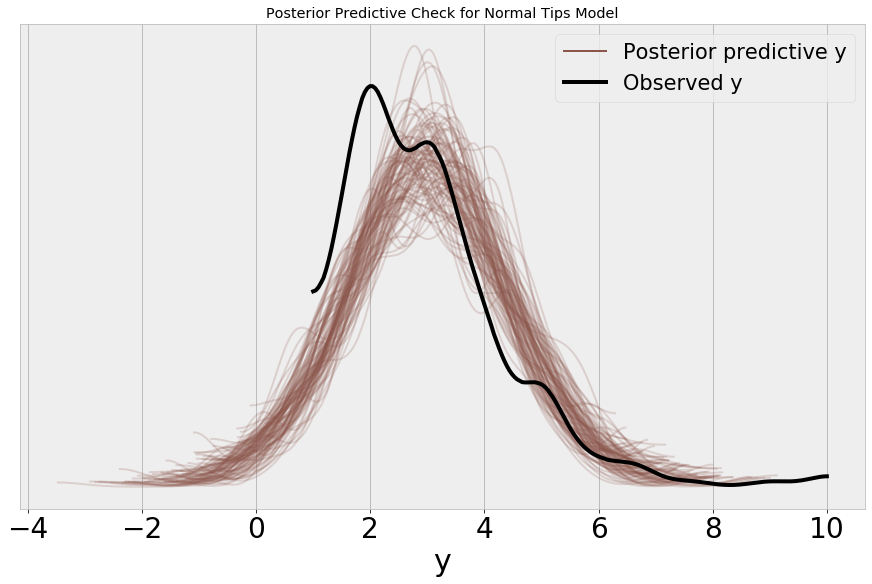

In [34]:
tips_normal = az.from_pymc3(trace=trace_normal, posterior_predictive=y_pred_normal)
axes = az.plot_ppc(tips_normal, figsize=(12,8), mean=False)
axes[0].set_title("Posterior Predictive Check for Normal Tips Model");

### Shared $\nu$ across all groups

In [35]:
with pm.Model() as comparing_groups:
    μ = pm.Normal('μ', mu=0, sd=10, shape=groups)
    σ = pm.HalfNormal('σ', sd=10, shape=groups)
    ν = pm.Exponential('ν', 1/30)
    
    y = pm.StudentT('y', mu=μ[idx], sd=σ[idx], nu=ν, observed=tip)
    
    trace_nu_shared = pm.sample(5000)
    y_pred_nu_shared = pm.sample_posterior_predictive(trace_nu_shared, 100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ν, σ, μ]
Sampling 2 chains, 0 divergences: 100%|██████████████████████████████████████| 11000/11000 [00:21<00:00, 502.33draws/s]
C:\Users\zhaolei\Anaconda3\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 572.36it/s]


arviz.data.io_pymc3 - WARNING - posterior predictive shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


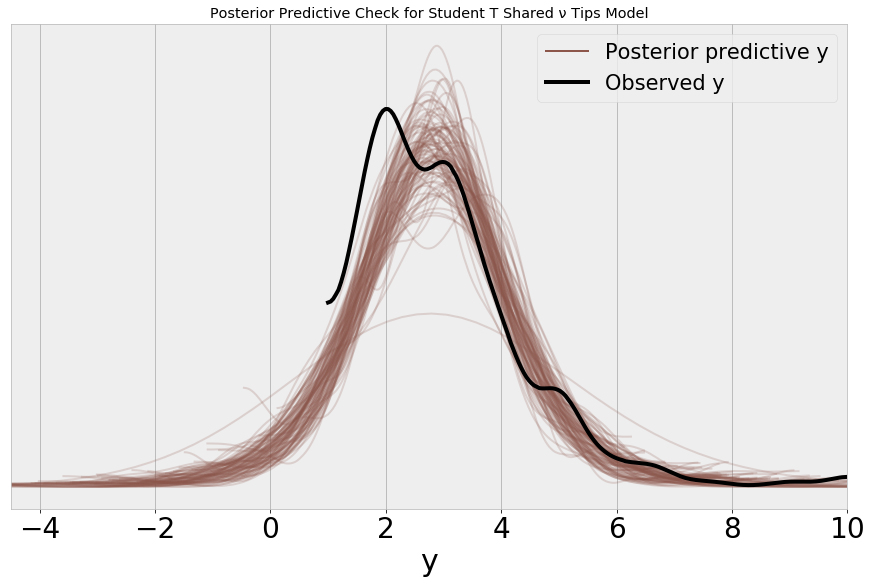

In [36]:
tips_nu_shared = az.from_pymc3(trace=trace_nu_shared, posterior_predictive=y_pred_nu_shared)
axes = az.plot_ppc(tips_nu_shared, figsize=(12,8), mean=False)
axes[0].set_title("Posterior Predictive Check for Student T Shared ν Tips Model")
axes[0].set_xlim(-4.5,10);

### One $\nu$ per group

In [10]:
with pm.Model() as comparing_groups:
    μ = pm.Normal('μ', mu=0, sd=10, shape=groups)
    σ = pm.HalfNormal('σ', sd=10, shape=groups)
    ν = pm.Exponential('ν', 1/30, shape=groups)
    
    y = pm.StudentT('y', mu=μ[idx], sd=σ[idx], nu=ν[idx], observed=tip)
    
    trace_nu_per_group = pm.sample(5000,cores=1,target_accept=0.9)
    y_pred_nu_per_group = pm.sample_posterior_predictive(trace_nu_per_group, 100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ν, σ, μ]
Sampling chain 1, 0 divergences: 100%|████████████████████████████████████████████| 5500/5500 [00:18<00:00, 296.96it/s]
C:\Users\zhaolei\Anaconda3\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 50.99it/s]


arviz.data.io_pymc3 - WARNING - posterior predictive variable y's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


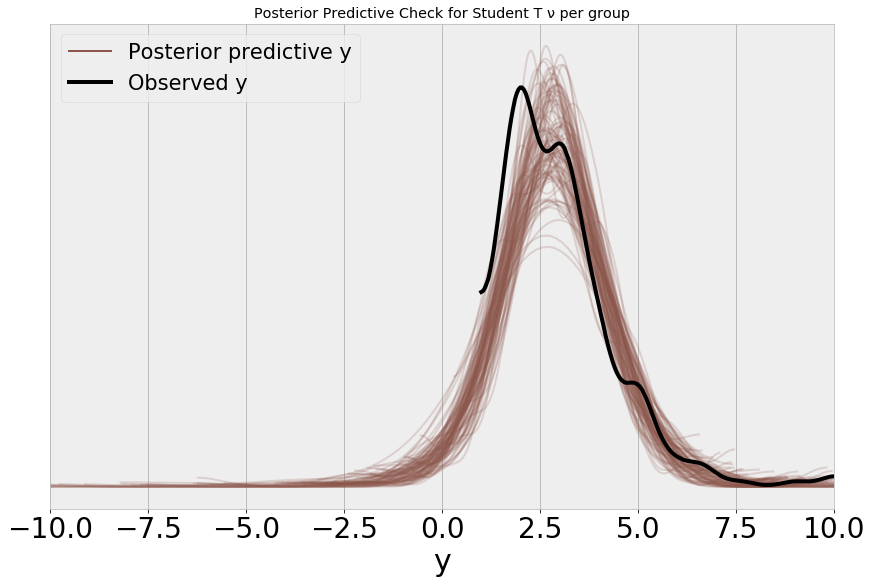

In [11]:
tips_nu_per_group = az.from_pymc3(trace=trace_nu_per_group, posterior_predictive=y_pred_nu_per_group)
axes = az.plot_ppc(tips_nu_per_group, figsize=(12,8), mean=False)
axes[0].set_title("Posterior Predictive Check for Student T ν per group")
axes[0].set_xlim(-10,10);

## Question 6
***

*Compute the probability of superiority directly from the posterior (without computing Cohen's d first). You can use the `pm.sample_posterior_predictive()` function to take a sample from each group. Is it really different from the calculation assuming normality? Can you explain the result?*

The goal is to calculate Cohen's D numerically. We'll do that in 3 steps:

1. Fit a distribution of parameters to our data
2. Generate posterior predictive distributions for our groups
3. Pick data points at random from each group and compare the datapoints in each group

### Step 1: Estimate model parameters per group

In [27]:
tips = pd.read_csv('../code/data/tips.csv')
tip = tips['tip'].values
idx = pd.Categorical(tips['day'],
                     categories=['Thur', 'Fri', 'Sat', 'Sun']).codes
groups = len(np.unique(idx))
groups
tip.shape

(244,)

In [8]:
with pm.Model() as comparing_groups:
    μ = pm.Normal('μ', mu=0, sd=10, shape=groups)
    σ = pm.HalfNormal('σ', sd=10, shape=groups)
    
    y = pm.Normal('y', mu=μ[idx], sd=σ[idx], observed=tip)
    
    trace_cg = pm.sample(5000)
    ppc_cg = pm.sample_posterior_predictive(trace_cg, samples=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ]
Sampling 2 chains, 0 divergences: 100%|██████████████████████████████████████| 11000/11000 [00:24<00:00, 444.93draws/s]
C:\Users\zhaolei\Anaconda3\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 647.27it/s]


In [9]:
flat_tips = az.from_pymc3(trace=trace_cg)
tips_gaussian = az.summary(flat_tips)
tips_gaussian

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
μ[0],2.771,0.161,2.458,3.070,0.001,0.001,12070.0,12070.0,12108.0,7536.0,1.0
μ[1],2.731,0.254,2.260,3.210,0.002,0.002,10980.0,10922.0,11083.0,7255.0,1.0
μ[2],2.993,0.177,2.673,3.336,0.002,0.001,12118.0,12059.0,12146.0,7346.0,1.0
μ[3],3.257,0.142,2.991,3.523,0.001,0.001,11224.0,11163.0,11264.0,7375.0,1.0
σ[0],1.266,0.118,1.052,1.491,0.001,0.001,11711.0,11367.0,12127.0,8204.0,1.0
σ[1],1.094,0.201,0.757,1.469,0.002,0.002,9788.0,8881.0,10962.0,7184.0,1.0
σ[2],1.655,0.128,1.423,1.898,0.001,0.001,11069.0,10703.0,11562.0,7350.0,1.0
σ[3],1.254,0.105,1.056,1.444,0.001,0.001,11519.0,11160.0,11926.0,7312.0,1.0


### Step 2: Get posterior predictive values per group
In our case, let's see if Sunday is superior to Thursday in regards to tips. 

In our code, recall that:
* We have 244 items
* We encoded the string labels of days into "codes" or integers
* Sunday was encoded as 3, Thursday was encoded as 0

In [10]:
# Get our model's predictions for possible tips on Thursday and Sunday
posterior_predictive_thursday = ppc_cg["y"][:,idx==0].flatten()
posterior_predictive_sunday = ppc_cg["y"][:,idx==3].flatten()

In [28]:
print(ppc_cg["y"].shape)
print(ppc_cg["y"][:,idx==0].shape)

(500, 244)
(500, 62)


Just to get a sense of the distributions, let's plot them:

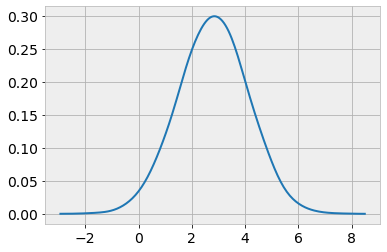

In [11]:
az.plot_kde(posterior_predictive_thursday);

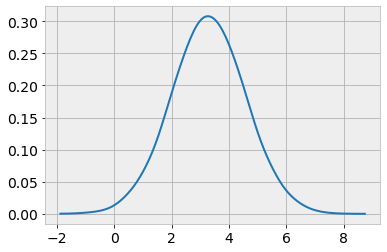

In [12]:
az.plot_kde(posterior_predictive_sunday);

From visual inspection, it's hard to see the difference between the two groups.

### Step 3: Pick data points at random from each group and compare

Let's numerically simulate Cohen's D by drawing random samples from both posterior predictive distributions and naively calculating probability

In [46]:
count_superior = 0
samples = 1000
for _ in range(samples):
    thursday_tip_draw = np.random.choice(posterior_predictive_thursday)
    sunday_tip_draw = np.random.choice(posterior_predictive_sunday)
    if thursday_tip_draw > sunday_tip_draw:
        count_superior +=1
        
count_superior/samples

0.384

.397 is very similar to the calculation we obtained in Figure 2.18. This means that, given a tip on Thursday, there is only a 4 in 10 chance that it will be higher than a tip on Sunday. In other words, you should sign up for Sunday shifts if you're looking to make extra money! I encourage you to try changing the idx values to compare other groups.

For reference, another, more efficient way to compute Cohen's D is possible with numpy broadcasting. The code below is functionally identical to the code above, but by using numpy broadcasting we can write less code and the computation is completed more efficiently:

In [47]:
thursday_tip_draws = np.random.choice(posterior_predictive_thursday, replace=True, size=1000)
sunday_tip_draws = np.random.choice(posterior_predictive_sunday, replace=True, size=1000)

(thursday_tip_draws > sunday_tip_draws).mean()

0.384

## Question 7
***

*Repeat the exercise we did with `model_h`. This time, without hierarchical structure, use a flat prior such as $Beta(1,1)$. Compare the results of both models.*

In [48]:
# Generate data
N_samples = [30, 30, 30]
G_samples = [18, 3, 3] # [18, 18, 18]  # [3, 3, 3]  

group_idx = np.repeat(np.arange(len(N_samples)), N_samples)
data = []
for i in range(len(N_samples)):
    data.extend(np.repeat([1, 0], [G_samples[i], N_samples[i]-G_samples[i]]))

In [49]:
# Baseline model
with pm.Model() as model_h:
    μ = pm.Beta('μ', 1., 1.)
    κ = pm.HalfNormal('κ', 10.)
    
    θ = pm.Beta('θ', alpha=μ*κ, beta=(1.0-μ)*κ, shape=len(N_samples))
    
    y = pm.Bernoulli('y', p=θ[group_idx], observed=data)
    
    trace_h = pm.sample(2000)
    ppc_h = pm.sample_posterior_predictive(trace_h, samples=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [θ, κ, μ]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 5000/5000 [00:11<00:00, 421.01draws/s]
C:\Users\zhaolei\Anaconda3\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1068.95it/s]


C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

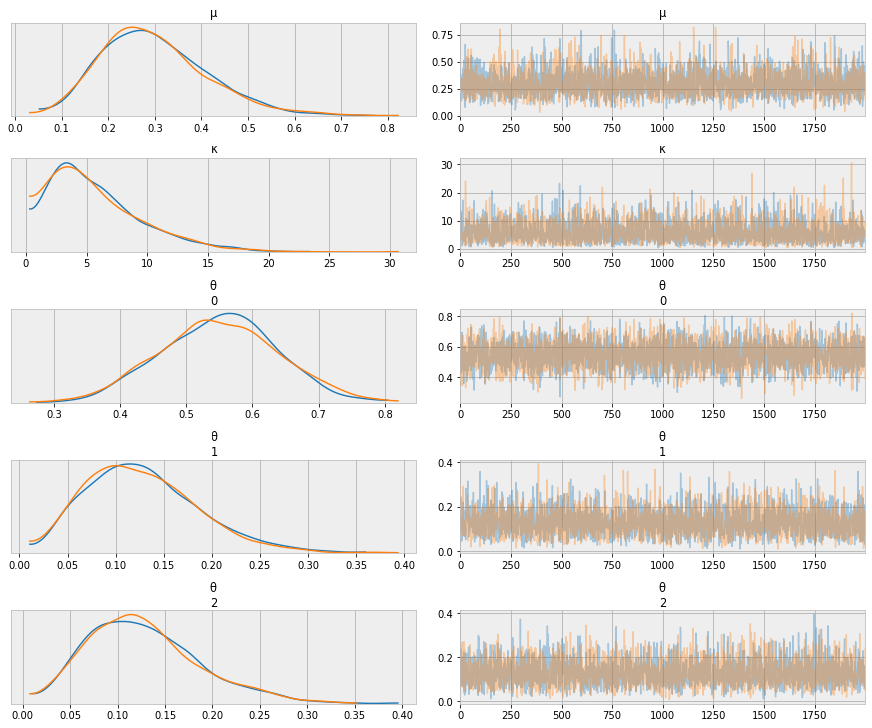

In [50]:
az.plot_trace(trace_h);

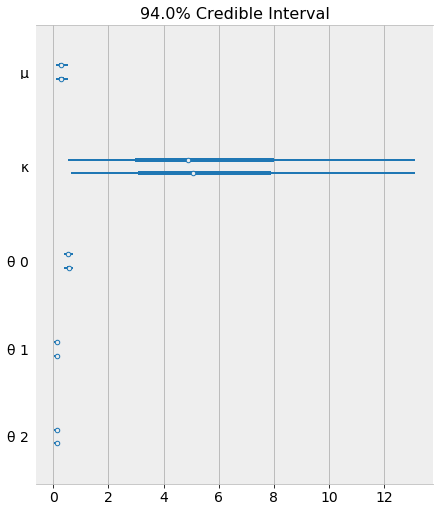

In [51]:
az.plot_forest(trace_h);

In [52]:
baseline_summary = az.summary(trace_h)
baseline_summary

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
μ,0.300,0.117,0.104,0.523,0.002,0.002,2581.0,2347.0,2737.0,2213.0,1.0
κ,5.877,3.883,0.555,13.123,0.076,0.054,2579.0,2554.0,2485.0,2814.0,1.0
θ[0],0.549,0.087,0.389,0.714,0.002,0.001,3040.0,3034.0,3037.0,2331.0,1.0
θ[1],0.128,0.058,0.030,0.233,0.001,0.001,3533.0,3533.0,3067.0,2777.0,1.0
θ[2],0.128,0.059,0.028,0.241,0.001,0.001,3542.0,3542.0,3287.0,2402.0,1.0


arviz.data.io_pymc3 - WARNING - posterior predictive shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


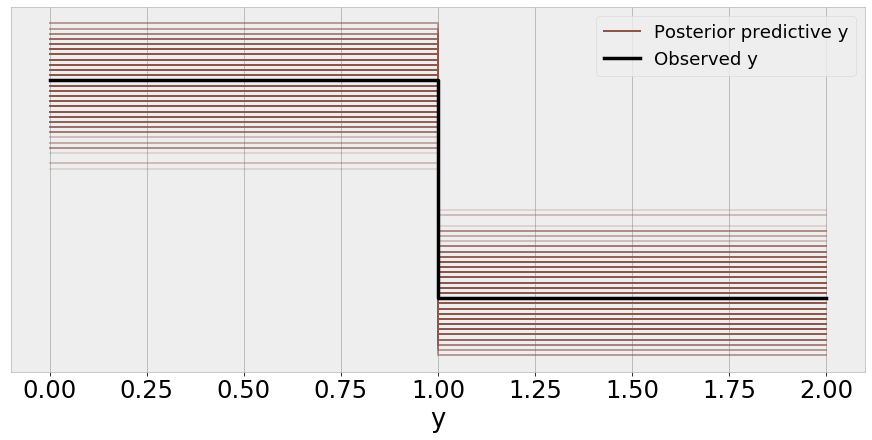

In [53]:
baseline_model = az.from_pymc3(trace=trace_h, posterior_predictive=ppc_h)
az.plot_ppc(baseline_model, figsize=(12,6), mean=False);

In [54]:
# Flat model
with pm.Model() as model_h:
    μ = pm.Beta('μ', 1., 1.)
    κ = pm.HalfNormal('κ', 10.)
    
    θ = pm.Beta('θ', alpha=μ*κ, beta=(1.0-μ)*κ)
    
    y = pm.Bernoulli('y', p=θ, observed=data)
    
    trace_non_h = pm.sample(2000)
    ppc_non_h = pm.sample_posterior_predictive(trace_non_h, samples=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [θ, κ, μ]
Sampling 2 chains, 1 divergences: 100%|████████████████████████████████████████| 5000/5000 [00:19<00:00, 253.72draws/s]
C:\Users\zhaolei\Anaconda3\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1537.84it/s]


C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

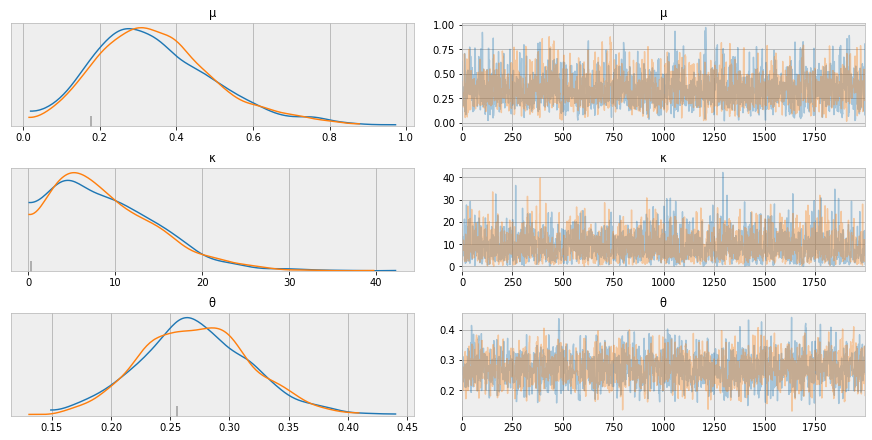

In [55]:
az.plot_trace(trace_non_h);

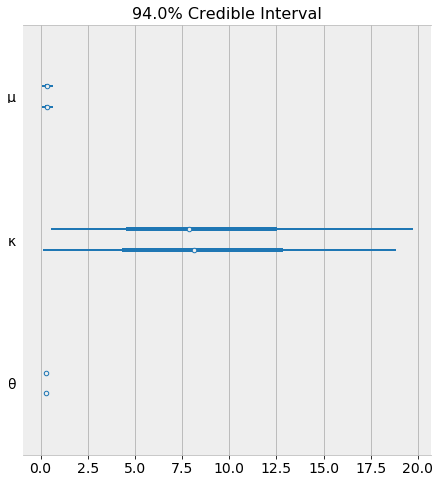

In [56]:
az.plot_forest(trace_non_h);

In [57]:
flat_summary = az.summary(trace_non_h)
flat_summary

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
μ,0.345,0.157,0.068,0.646,0.003,0.003,2096.0,1902.0,2138.0,1840.0,1.0
κ,9.061,5.937,0.115,19.199,0.128,0.091,2141.0,2141.0,1762.0,1481.0,1.0
θ,0.271,0.047,0.182,0.359,0.001,0.001,2085.0,2085.0,2084.0,1912.0,1.0


arviz.data.io_pymc3 - WARNING - posterior predictive shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


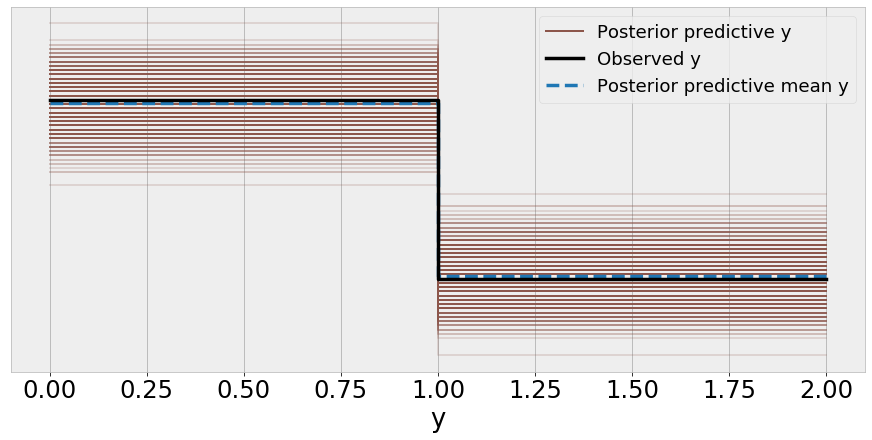

In [58]:
flat_model = az.from_pymc3(trace=trace_non_h, posterior_predictive=ppc_non_h)
az.plot_ppc(flat_model, figsize=(12,6));

#### Summary comparison

In [59]:
pd.concat([baseline_summary, flat_summary])

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
μ,0.300,0.117,0.104,0.523,0.002,0.002,2581.0,2347.0,2737.0,2213.0,1.0
κ,5.877,3.883,0.555,13.123,0.076,0.054,2579.0,2554.0,2485.0,2814.0,1.0
θ[0],0.549,0.087,0.389,0.714,0.002,0.001,3040.0,3034.0,3037.0,2331.0,1.0
θ[1],0.128,0.058,0.030,0.233,0.001,0.001,3533.0,3533.0,3067.0,2777.0,1.0
θ[2],0.128,0.059,0.028,0.241,0.001,0.001,3542.0,3542.0,3287.0,2402.0,1.0
μ,0.345,0.157,0.068,0.646,0.003,0.003,2096.0,1902.0,2138.0,1840.0,1.0
κ,9.061,5.937,0.115,19.199,0.128,0.091,2141.0,2141.0,1762.0,1481.0,1.0
θ,0.271,0.047,0.182,0.359,0.001,0.001,2085.0,2085.0,2084.0,1912.0,1.0


#### Discussion
In the hiearchical model, we get three estimates of $\theta$, one per each group. So, by using a hierarchical model, we're able to obtain the range of $\theta$ parameters per group, and not just the average $\theta$ parameter for all groups.在分层模型中，我们得到estimates的三个估计，每组一个。 因此，通过使用分层模型，我们能够获得每个组的𝜃参数的范围，而不仅仅是所有组的平均𝜃参数。

## Question 8
***

*Create a hierarchical version of the tips example by partially pooling across the days of the week. Compare the results to those obtained without the hierarchical structure.*

Refer to Question 6 for the non-pooled version of the model.

In [61]:
with pm.Model() as pooled_mu_tips:
    
    # Pooled Expected mean of tips
    pooled_mean = pm.Normal('pooled_mean', mu=0., sd=10.)
    μ = pm.Normal("μ", mu=pooled_mean, sd=1., shape=groups)
    
    # Unpooled Standard Deviation of tips
    σ = pm.HalfNormal('σ', sd=10., shape=groups)

    y = pm.Normal('y', mu=μ[idx], sd=σ[idx], observed=tip)
    
    trace_pooled_tips = pm.sample(5000)
    ppc_pooled_tips = pm.sample_posterior_predictive(trace_pooled_tips, samples=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ, pooled_mean]
Sampling 2 chains, 0 divergences: 100%|██████████████████████████████████████| 11000/11000 [00:25<00:00, 437.45draws/s]
C:\Users\zhaolei\Anaconda3\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 559.48it/s]


C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

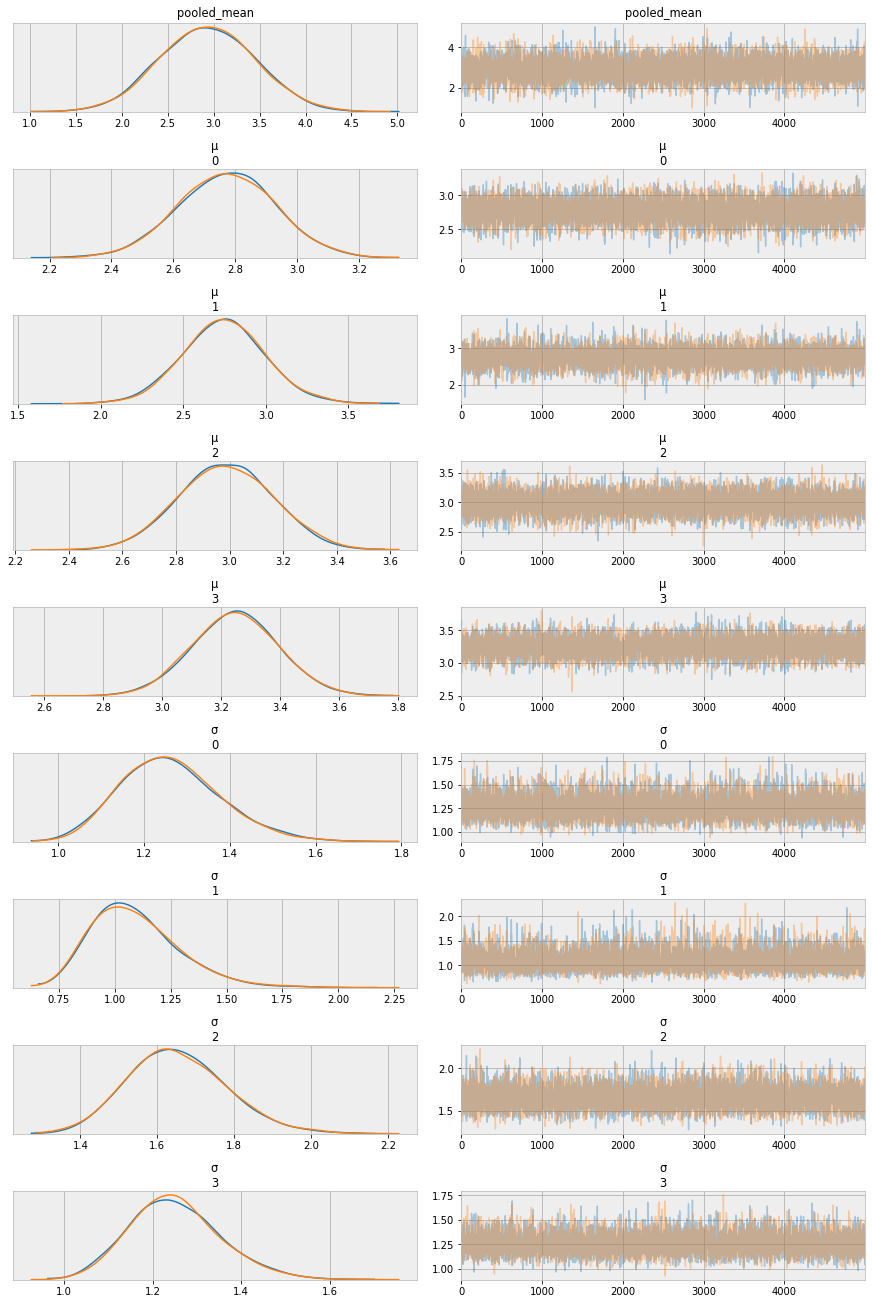

In [62]:
az.plot_trace(trace_pooled_tips);

In [63]:
pooled_tips_dataset = az.from_pymc3(trace=trace_pooled_tips)
tips_pooled_summary = az.summary(pooled_tips_dataset)
tips_pooled_summary

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
pooled_mean,2.936,0.515,1.988,3.897,0.004,0.003,13110.0,12960.0,13117.0,7661.0,1.0
μ[0],2.773,0.157,2.472,3.059,0.001,0.001,13322.0,13322.0,13351.0,7899.0,1.0
μ[1],2.747,0.250,2.291,3.234,0.002,0.002,10760.0,10565.0,10994.0,6747.0,1.0
μ[2],2.987,0.173,2.679,3.322,0.002,0.001,13012.0,12986.0,12971.0,8139.0,1.0
μ[3],3.249,0.143,2.986,3.521,0.001,0.001,14589.0,14404.0,14487.0,8017.0,1.0
σ[0],1.264,0.117,1.051,1.480,0.001,0.001,12438.0,11979.0,12959.0,7586.0,1.0
σ[1],1.097,0.200,0.759,1.461,0.002,0.001,10114.0,9057.0,11873.0,6977.0,1.0
σ[2],1.654,0.127,1.425,1.897,0.001,0.001,13315.0,12952.0,13621.0,7605.0,1.0
σ[3],1.253,0.103,1.060,1.442,0.001,0.001,12243.0,11915.0,12546.0,7978.0,1.0


In [64]:
pd.concat([tips_gaussian, tips_pooled_summary])

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
μ[0],2.772,0.162,2.453,3.068,0.002,0.001,11296.0,11296.0,11319.0,7845.0,1.0
μ[1],2.730,0.250,2.276,3.206,0.002,0.002,10125.0,10019.0,10378.0,7299.0,1.0
μ[2],2.994,0.175,2.665,3.320,0.002,0.001,10326.0,10326.0,10307.0,6806.0,1.0
μ[3],3.253,0.146,2.979,3.526,0.001,0.001,12293.0,12266.0,12323.0,7567.0,1.0
σ[0],1.265,0.118,1.056,1.490,0.001,0.001,12444.0,11981.0,12939.0,8041.0,1.0
σ[1],1.095,0.203,0.754,1.474,0.002,0.002,9677.0,8451.0,11542.0,7537.0,1.0
σ[2],1.654,0.128,1.419,1.898,0.001,0.001,10361.0,10064.0,10898.0,7115.0,1.0
σ[3],1.255,0.104,1.062,1.451,0.001,0.001,11507.0,11177.0,11868.0,7574.0,1.0
pooled_mean,2.936,0.515,1.988,3.897,0.004,0.003,13110.0,12960.0,13117.0,7661.0,1.0
μ[0],2.773,0.157,2.472,3.059,0.001,0.001,13322.0,13322.0,13351.0,7899.0,1.0


分层后，所有的$\mu$都会向2.936靠近。

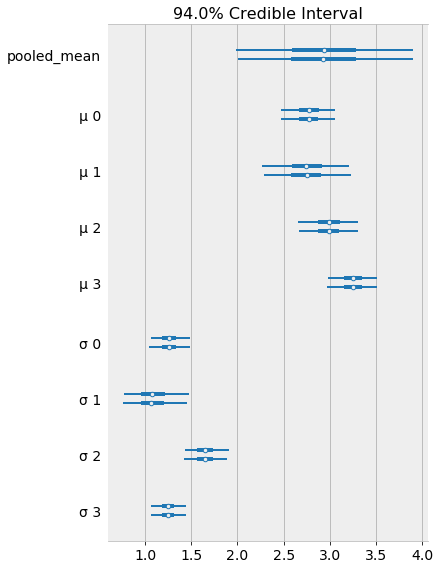

In [65]:
az.plot_forest(pooled_tips_dataset);

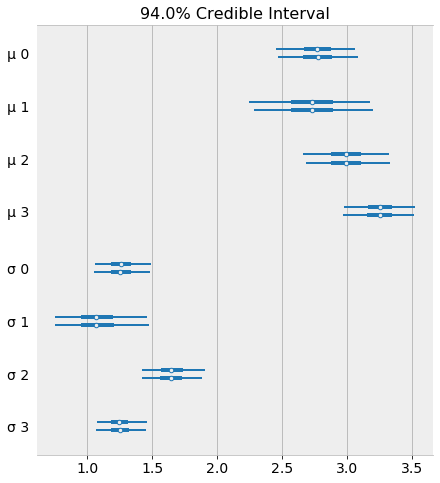

In [66]:
az.plot_forest(flat_tips);

## Question 9
***

*PyMC3 can create **directed acyclic graphs (DAGs)** from models that are very similar to Kruschke's diagrams. You can obtain them using the `pm.model_to_graphviz()` function. To generate DAGs, you may need to install graphviz using the command `conda install -c conda-forge python-graphviz`. Generate a DAG for each model in this chapter.*

In [72]:
import os
import graphviz
pm.model_to_graphviz(pooled_mu_tips)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

*A last note before finishing up: besides the exercises you'll find at the end of each chapter, you can always try to (and probably should) think of problems you are interested in and how to apply what you have learned to that problem. Maybe you will need to define your problem in a different way, or maybe you will need to expand or modify the models you have learned. If you think this task is beyond your current skills, note down the problem and come back to it after reading another chapter in this book. Eventually, if the book does not answer your questions, check the [PyMC3 examples](https://docs.pymc.io/nb_examples/index.html) or ask a question on [PyMC's Discourse](https://discourse.pymc.io/).*

在结束之前的最后一个注解：除了在每一章结尾处都会找到的练习之外，您始终可以尝试（并且应该考虑）您感兴趣的问题以及如何将学到的知识应用于该问题。 也许您将需要以不同的方式定义问题，或者可能需要扩展或修改所学的模型。 如果您认为此任务超出了您当前的技能范围，请记下该问题，并在阅读本书的另一章之后再进行讨论。 最终，如果这本书没有回答您的问题，请查看PyMC3示例或在PyMC的论述中提出问题。